# Time Series 

#### In general, time series serve two purposes
- First, they help us to learn about the <strong> underlying process </strong> that generated the data.
- We would like to be able to<strong> forecast future values of the same or related series using existing data </strong>. When
we measure temperature, precipitation or wind, we would like to learn more about
more complex things, such as weather or the climate of a region and how various
factors interact. At the same time, we might be interested in weather forecasting.

#### In this chapter we will explore the time series capabilities of Pandas.
- Apart from its powerful core data structures – the series and the DataFrame – Pandas comes
with helper functions for dealing with time related data. With its extensive built-in
optimizations, Pandas is capable of handling large time series with millions of data
points with ease.

## Ở phần này:
#### Python hỗ trợ xử lý Data & Time Với thư viện Datetime
#### Ta có thể xử dụng DataFrame và Series 
#### Sử dụng hàm to_Datetime 

  - df = pd.DataFrame({' year': [2015, 2016],

                  'month': [2, 3],
                  
                    'day': [4, 5]
                  })
pd.to_datetime(df)

  - ts = pd.Series(np.random.randn(len(index)), index=["2000-01-01", "2000-01-02", "2000-01-03"])
 
tsindex = pd.to_datetime(["2000-01-01", "2000-01-02", "2000-01-03"])

#### Với Pandas ta có thể tạo ra 1 range date với hàm date_range 

# Time series primer

## 1. Working with date and time objects

###### Python supports date and time handling in the date time and time modules from the standard library:

In [41]:
import datetime 
%matplotlib inline

In [2]:
datetime.datetime(2000,1,1)

datetime.datetime(2000, 1, 1, 0, 0)

- Sometimes, dates are given or expected as strings, so a conversion from or to strings is necessary, which is realized by two functions: strptime and strftime, respectively:

In [3]:
type(datetime.datetime(2000,1,1))

datetime.datetime

In [4]:
datetime.datetime(2000,1,1).strftime("%Y%m%d")

'20000101'

In [5]:
type(datetime.datetime(2000,1,1).strftime("%Y%m%d"))

str

In [6]:
datetime.datetime.strptime("2000/1/1", "%Y/%m/%d")

datetime.datetime(2000, 1, 1, 0, 0)

In [7]:
type(datetime.datetime.strptime("2000/1/1", "%Y/%m/%d"))

datetime.datetime

- Real-world data usually comes in all kinds of shapes and it would be great if we did
not need to remember the ex4act date format specifes for parsing. Thankfully, Pandas
abstracts away a lot of the friction, when dealing with strings representing dates or
time. One of these helper functions is to_datetime:

In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.DataFrame({'year': [2015, 2016],
                  'month': [2, 3],
                    'day': [4, 5]
                  })
pd.to_datetime(df)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [10]:
pd.to_datetime("04:08:06 7-8-2000")

Timestamp('2000-07-08 04:08:06')

In [11]:
pd.to_datetime("15:05:06 4th of July of 2012")

Timestamp('2012-07-04 15:05:06')

In [12]:
pd.to_datetime("13.01.2000")

Timestamp('2000-01-13 00:00:00')

In [13]:
pd.to_datetime("7/8/2000")

Timestamp('2000-07-08 00:00:00')

- The last can refer to August 7th or July 8th, depending on the region. To <strong> disambiguate (làm cho thành một nghĩa) </strong> this case, to_datetime can be passed a keyword argument <strong> dayfirst </strong>:

In [14]:
pd.to_datetime("7/8/2000", dayfirst=True) 

Timestamp('2000-08-07 00:00:00')

- Timestamp objects can be seen as Pandas' version of datetime objects and indeed, the Timestamp class is a c of datetime

- @subclass

(logic học) lớp con

unequal s.es (thống kê) các nhóm con không đều nhau

In [15]:
issubclass(pd.Timestamp, datetime.datetime)

True

- Which means they can be used interchangeably in many cases:

In [16]:
ts = pd.to_datetime(715784800000854700)
ts

Timestamp('1992-09-06 13:06:40.000854700')

In [17]:
ts.year, ts.month, ts.day, ts.dayofweek, ts.dayofyear,ts.days_in_month,ts.daysinmonth, ts.weekday(), ts.today()

(1992, 9, 6, 6, 250, 30, 30, 6, Timestamp('2017-12-25 21:53:47.252985'))

- Timestamp objects are an important part of time series capabilities of Pandas, since timestamps are the building block of DateTimeIndex objects:

In [18]:
index = [pd.Timestamp("2000-01-01"),
pd.Timestamp("2000-01-02"),
pd.Timestamp("2000-01-03")]

In [19]:
index

[Timestamp('2000-01-01 00:00:00'),
 Timestamp('2000-01-02 00:00:00'),
 Timestamp('2000-01-03 00:00:00')]

In [20]:
ts = pd.Series(np.random.randn(len(index)), index=index)
ts

2000-01-01    0.089240
2000-01-02   -1.472215
2000-01-03    0.109225
dtype: float64

In [21]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

- There are a few things to note here: We create a list of <strong> timestamp objects </strong> and pass
it to the <strong> series constructor </strong> as <strong>index </strong>. <strong>This list of timestamps gets converted into a
DatetimeIndex on the ﬂy. If we had passed only the date strings, we would not
get a DatetimeIndex, just an index:</strong>

In [22]:
 ts = pd.Series(np.random.randn(len(index)), index=["2000-01-01", "2000-01-02", "2000-01-03"])
ts

2000-01-01   -0.569081
2000-01-02   -1.144054
2000-01-03    0.617624
dtype: float64

In [23]:
ts.index

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object')

- However, the to_datetime function is ﬂexible enough to be of help, if all we have
is a list of date strings:

In [24]:
index = pd.to_datetime(["2000-01-01", "2000-01-02", "2000-01-03"])

In [25]:
index = pd.to_datetime(["2000-01-01", "2000-01-02", "2000-01-03"])

In [26]:
ts.index

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object')

- Another thing to note is that while we have a DatetimeIndex, the freq and tz
attributes are both None. We will learn about the utility of both attributes later
in this chapter.

- With to_datetime we are able to convert a variety of strings and even lists of strings
into timestamp or DatetimeIndex objects. Sometimes we are not explicitly given all
the information about a series and we have to generate sequences of time stamps of
fxed intervals ourselves.

### Pandas offer another great utility function for this task: date_range

pd.date_range(start="2000-01-01", periods=3, freq='S')

#### S Secondly frequency

In [27]:
pd.date_range(start="2000-01-01", periods=4, freq='H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00'],
              dtype='datetime64[ns]', freq='H')

#### S Secondly frequency

In [28]:
pd.date_range(start="2000-01-01", periods=3, freq='M')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

#### H Hourly frequency

In [29]:
pd.date_range(start="2000-01-01", periods=3, freq='T')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00'],
              dtype='datetime64[ns]', freq='T')

#### T Minutely frequency

- <strong> periods  </strong>: integer or None, default None
    If None, must specify start and end.
    
- <strong> freq  </strong>: string or DateOffset, default 'D' (calendar daily)
    Frequency strings can have multiples, e.g. '5H'

The <strong> freq </strong> attribute allows us to specify a multitude of options. Pandas has been
used successfully in fnance and economics, not least because it is really simple to
work with business dates as well. As an example, to get an index with the frst three
business days of the millennium, the B offset alias can be used:

In [30]:
pd.date_range(start="2000-01-01", periods=3, freq='B')

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05'], dtype='datetime64[ns]', freq='B')

#### B Business day frequency

In [31]:
pd.date_range(start="2000-01-01", periods=5, freq='1D1h1min10s')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-02 01:01:10',
               '2000-01-03 02:02:20', '2000-01-04 03:03:30',
               '2000-01-05 04:04:40'],
              dtype='datetime64[ns]', freq='90070S')

- Moreover, The offset aliases can be used in combination as well. Here, we are
generating a datetime index with fve elements, each one day, one hour, one minute
and one second apart:

In [32]:
pd.date_range(start="2000-01-01", periods=5, freq='12BH')

DatetimeIndex(['2000-01-03 09:00:00', '2000-01-04 13:00:00',
               '2000-01-06 09:00:00', '2000-01-07 13:00:00',
               '2000-01-11 09:00:00'],
              dtype='datetime64[ns]', freq='12BH')

- If we want to index data every 12 hours of our business time, which by default starts
at 9 AM and ends at 5 PM, we would simply prefx the BH alias:

In [33]:
ts.index

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object')

In [34]:
pd.date_range(start="2000-01-01", periods=5, freq='W-FRI')

DatetimeIndex(['2000-01-07', '2000-01-14', '2000-01-21', '2000-01-28',
               '2000-02-04'],
              dtype='datetime64[ns]', freq='W-FRI')

- Some frequencies allow us to specify an anchoring suffx, which allows us to express intervals, such as every <strong> Friday </strong> or  <strong> every second Tuesday </strong> of the month:

In [35]:
pd.date_range(start="12-12-2017",periods=6,freq="WOM-2TUE")

DatetimeIndex(['2017-12-12', '2018-01-09', '2018-02-13', '2018-03-13',
               '2018-04-10', '2018-05-08'],
              dtype='datetime64[ns]', freq='WOM-2TUE')

Tham khảo tại: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [42]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/TrinhDinhPhuc/Miscellaneous-Python-Project/blob/master/Time_Series/series.png")


<br><br><center><h1 style="font-size:2em;color:#2467C0">Offset Aliases</h1></center>
<br>
<img src="https://github.com/TrinhDinhPhuc/Miscellaneous-Python-Project/blob/master/Time_Series/series.png" align="middle" style="width:550px;height:360px;"/>


----------------------------------------------------------------------------------------------------

### MOREOVER, THE OFFSET ALIASES CAN BE USED IN COMBINATION AS WELL

* Here i'm generating a datetime index with five elements, each one day, one hour, one minutes and one second apart * 

In [44]:
pd.date_range(start="2017-12-26",periods=5,freq="1D1h1min10s")

DatetimeIndex(['2017-12-26 00:00:00', '2017-12-27 01:01:10',
               '2017-12-28 02:02:20', '2017-12-29 03:03:30',
               '2017-12-30 04:04:40'],
              dtype='datetime64[ns]', freq='90070S')

if we want to index data <strong> every 12 hours </strong> of our bussiness time, which by default starts at 9am and ends at 5pm, we would simply prefix the BH alias

In [45]:
pd.date_range(start="2017-12-26",periods=5,freq="12BH")

DatetimeIndex(['2017-12-26 09:00:00', '2017-12-27 13:00:00',
               '2017-12-29 09:00:00', '2018-01-01 13:00:00',
               '2018-01-03 09:00:00'],
              dtype='datetime64[ns]', freq='12BH')

In [46]:
pd.date_range(start="2017/11/11",periods=5,freq="W-FRI")

DatetimeIndex(['2017-11-17', '2017-11-24', '2017-12-01', '2017-12-08',
               '2017-12-15'],
              dtype='datetime64[ns]', freq='W-FRI')

In [49]:
pd.date_range(start="2017/11/11",periods=5,freq="WOM-2TUE")

DatetimeIndex(['2017-11-14', '2017-12-12', '2018-01-09', '2018-02-13',
               '2018-03-13'],
              dtype='datetime64[ns]', freq='WOM-2TUE')

### Lưu ý:
- ko phân biệt "?" hoặc "/"

----------------------------------------------------------------------------------------------------

### BAS (BUSINESS YEAR START FREQUENCY)

In [61]:
s= pd.date_range(start="2017/12/12",periods=5,freq="BAS-JAN")
s

DatetimeIndex(['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-03'],
              dtype='datetime64[ns]', freq='BAS-JAN')

### A (YEAR END FREQUENCY)

In [60]:
t=pd.date_range(start="2017/05/06",periods=5,freq="A-FEB")
t

DatetimeIndex(['2018-02-28', '2019-02-28', '2020-02-29', '2021-02-28',
               '2022-02-28'],
              dtype='datetime64[ns]', freq='A-FEB')

In [62]:
s.union(t)

DatetimeIndex(['2018-01-01', '2018-02-28', '2019-01-01', '2019-02-28',
               '2020-01-01', '2020-02-29', '2021-01-01', '2021-02-28',
               '2022-01-03', '2022-02-28'],
              dtype='datetime64[ns]', freq=None)

### Let's dive into Time Series by frist showing how you can create a plot time series

In [84]:
index = pd.date_range(start="2017-10-22",periods=200,freq="B")   # B ((Bussines day frequency))

In [85]:
ts = pd.Series(np.random.randn(len(index)),index=index)

In [86]:
walk=ts.cumsum
walk

<bound method Series.cumsum of 2017-10-23   -0.647055
2017-10-24   -0.146020
2017-10-25    0.373790
2017-10-26    0.721025
2017-10-27    0.365454
2017-10-30    0.590625
2017-10-31   -1.792590
2017-11-01   -1.015488
2017-11-02    2.192147
2017-11-03    0.668881
2017-11-06    0.701218
2017-11-07   -1.337673
2017-11-08   -0.645604
2017-11-09   -1.510165
2017-11-10   -1.818318
2017-11-13   -0.970190
2017-11-14    0.045615
2017-11-15    1.369266
2017-11-16    0.837486
2017-11-17   -0.033139
2017-11-20   -0.132577
2017-11-21    0.457524
2017-11-22   -0.727425
2017-11-23    0.782033
2017-11-24    1.308322
2017-11-27    0.686307
2017-11-28    0.792428
2017-11-29    0.289978
2017-11-30    1.323077
2017-12-01   -0.428529
                ...   
2018-06-18    2.045383
2018-06-19    0.210520
2018-06-20   -2.462301
2018-06-21   -0.245835
2018-06-22    0.803075
2018-06-25   -1.069897
2018-06-26    0.522203
2018-06-27    0.237758
2018-06-28    0.316427
2018-06-29   -0.091930
2018-07-02    0.668420
201

In [87]:
import matplotlib.pylab as plt


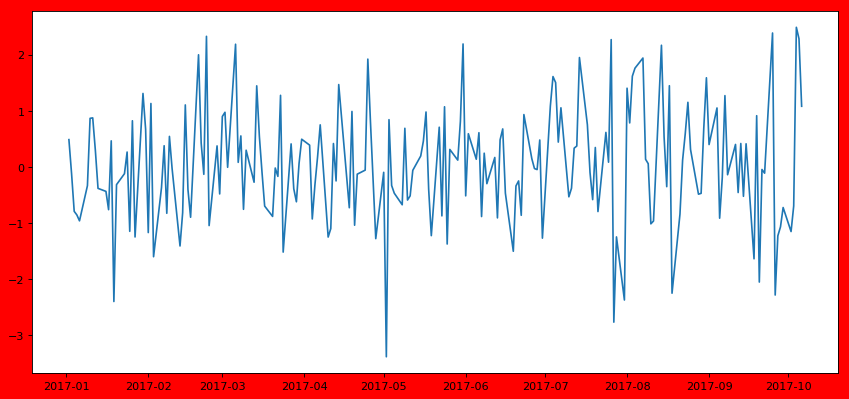

In [101]:
plt.figure(dpi=80,edgecolor="k",facecolor='r',figsize=(13,6))
plt.plot(ts)

---------------------------------------------------------------------------------------------

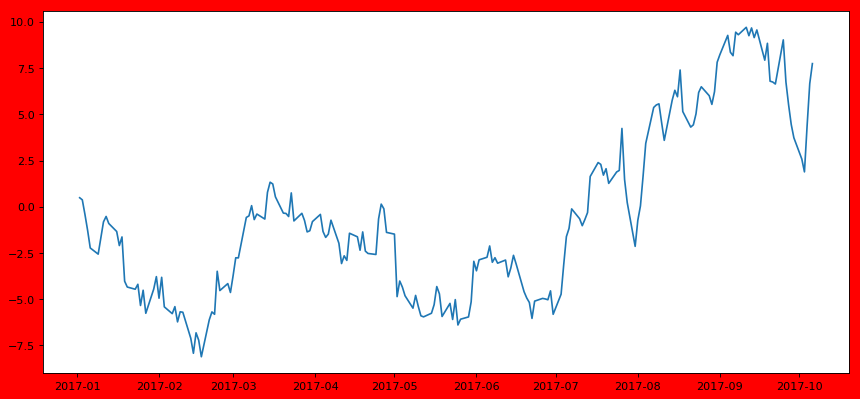

In [100]:
index = pd.date_range(start="2017/01/01",periods=200,freq="B")   # B ((Bussines day frequency))
ts = pd.Series(np.random.randn(len(index)),index=index)
loai2=ts.cumsum()
plt.figure(dpi=80,edgecolor='w',facecolor='r',figsize=(13,6))
plt.plot(loai2)